---

## **<font color="Dodgerblue"> Modelación Climática Tropical</font>**
### **<font color="crimson"> Ciclo anual MSWEP</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netCDF4 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5py netCDF4 h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.ticker as ticker

In [8]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

In [9]:
# Archivo de precipitación MSWEP
filename='/home/jovyan/ModClim/datos_actualizados/MSWEP_monthly_1980-2023.nc'
ds=xr.open_dataset(filename)
pr=ds['precipitation']
#pr.to_netcdf('MSWEP_Global.nc') # Guardar datos nc en caso de que no abra
pr

<xarray.DataArray 'precipitation' (time: 528, lat: 180, lon: 576)> Size: 219MB
[54743040 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-16T09:00:00 ... 2023-12-16T09:...
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
  * lon      (lon) float64 5kB 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7

In [10]:
pr.time

<xarray.DataArray 'time' (time: 528)> Size: 4kB
array(['1980-01-16T09:00:00.000000000', '1980-02-15T09:00:00.000000000',
       '1980-03-16T09:00:00.000000000', ..., '2023-10-16T09:00:00.000000000',
       '2023-11-15T21:00:00.000000000', '2023-12-16T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-16T09:00:00 ... 2023-12-16T09:...

In [11]:
# Convertimos las unidades
pr=pr*8
pr['units']='mm day-1'

In [12]:
pr

<xarray.DataArray 'precipitation' (time: 528, lat: 180, lon: 576)> Size: 219MB
array([[[2.562693  , 2.6024406 , 2.7338846 , ..., 3.0799243 ,
         2.9871328 , 2.7391763 ],
        [2.351883  , 2.2910767 , 2.353475  , ..., 2.979433  ,
         2.9485087 , 2.6356468 ],
        [2.237777  , 2.0963643 , 2.2239435 , ..., 2.6712742 ,
         2.6104686 , 2.431325  ],
        ...,
        [3.4713626 , 3.209657  , 2.7960432 , ..., 4.2770653 ,
         4.119744  , 3.8807352 ],
        [3.8979201 , 3.5536423 , 3.0383923 , ..., 3.6893911 ,
         3.9565306 , 4.1928635 ],
        [4.4706793 , 4.0528026 , 3.6469212 , ..., 3.503539  ,
         4.4710317 , 4.7945833 ]],

       [[2.6609406 , 2.4711268 , 2.282222  , ..., 2.4305298 ,
         2.5218227 , 2.5943134 ],
        [2.170432  , 2.0174098 , 2.0280635 , ..., 2.2015262 ,
         2.4642882 , 2.3559856 ],
        [1.7563738 , 1.5585538 , 1.672821  , ..., 2.0591736 ,
         2.278307  , 2.0179796 ],
...
        [6.012203  , 4.334403  , 3.551765  , ..., 8.868039  ,
         7.4874964 , 6.70755   ],
        [6.1414185 , 5.2041698 , 4.2199287 , ..., 8.020544  ,
         7.806594  , 6.697964  ],
        [6.0353856 , 5.469911  , 4.7717686 , ..., 8.155971  ,
         7.6964846 , 6.613976  ]],

       [[2.6519916 , 2.5411613 , 2.3672307 , ..., 2.0777428 ,
         2.0828552 , 2.3997886 ],
        [2.376737  , 2.5435457 , 2.3775585 , ..., 2.0550432 ,
         2.0518403 , 2.2449942 ],
        [2.2503383 , 2.2808568 , 2.401311  , ..., 2.0249834 ,
         1.9847343 , 2.0436695 ],
        ...,
        [3.1784782 , 2.5007682 , 1.8772199 , ..., 4.5417237 ,
         3.8065064 , 3.4520288 ],
        [2.9520423 , 2.6906555 , 2.417251  , ..., 3.8678842 ,
         3.3487303 , 2.737187  ],
        [3.470249  , 3.3645365 , 3.0199528 , ..., 4.3574333 ,
         3.7158394 , 3.123335  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-16T09:00:00 ... 2023-12-16T09:...
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
  * lon      (lon) float64 5kB 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7
    units    <U8 32B 'mm day-1'

In [13]:
pr.units

<xarray.DataArray 'units' ()> Size: 32B
array('mm day-1', dtype='<U8')
Coordinates:
    units    <U8 32B 'mm day-1'

In [14]:
pr_years = pr.sel(time=slice('1980', '2023'))

In [15]:
jjas = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)

In [16]:
mean_jjas = jjas.mean('time')

In [17]:
mean_jjas

<xarray.DataArray 'precipitation' (lat: 180, lon: 576)> Size: 415kB
array([[4.1020722, 4.145399 , 4.1809335, ..., 4.045134 , 4.016053 ,
        4.0330753],
       [4.2445297, 4.269407 , 4.279308 , ..., 4.169541 , 4.1616983,
        4.1919937],
       [4.3420644, 4.3475575, 4.3187413, ..., 4.2474217, 4.264086 ,
        4.3078594],
       ...,
       [2.3154097, 2.0040457, 1.7786714, ..., 2.3418005, 2.3322005,
        2.3701074],
       [2.0796487, 1.9982511, 1.947485 , ..., 1.8483864, 2.0271819,
        2.0010486],
       [2.0366838, 2.143252 , 2.119363 , ..., 1.7180028, 1.859213 ,
        1.8970608]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
  * lon      (lon) float64 5kB 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7
    units    <U8 32B 'mm day-1'

In [18]:
mean_jjas.min()

<xarray.DataArray 'precipitation' ()> Size: 4B
array(0.00050151, dtype=float32)
Coordinates:
    units    <U8 32B 'mm day-1'

In [19]:
mean_jjas.max()

<xarray.DataArray 'precipitation' ()> Size: 4B
array(38.12361, dtype=float32)
Coordinates:
    units    <U8 32B 'mm day-1'

### **<font color="Navy"> Ciclos anuales sobre el centro-sur de México </font>**


In [20]:
# Asignamos pesos con la función coseno
lats = pr_years.lat
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"

In [21]:
# Aplicamos el peso y luego el promedio espacial
pr_weighted = pr_years.weighted(weights)
pr_meanglobal = pr_weighted.mean(dim=['lat', 'lon'])

In [22]:
# Recortamos el centro-sur
centrolat=pr_years.sel(lat=slice(13.75,23.75))
centrolon=centrolat.sel(lon=slice(253.75,273.5))

centro_peso=centrolon.weighted(weights)
prcentro=centrolon.mean(["lon","lat"])

mensual_prcentro = prcentro.groupby(prcentro.time.dt.month).mean()
#mensual_prcentro.to_netcdf('MSWEP_ciclo_actualizado.nc')

In [23]:
meses=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

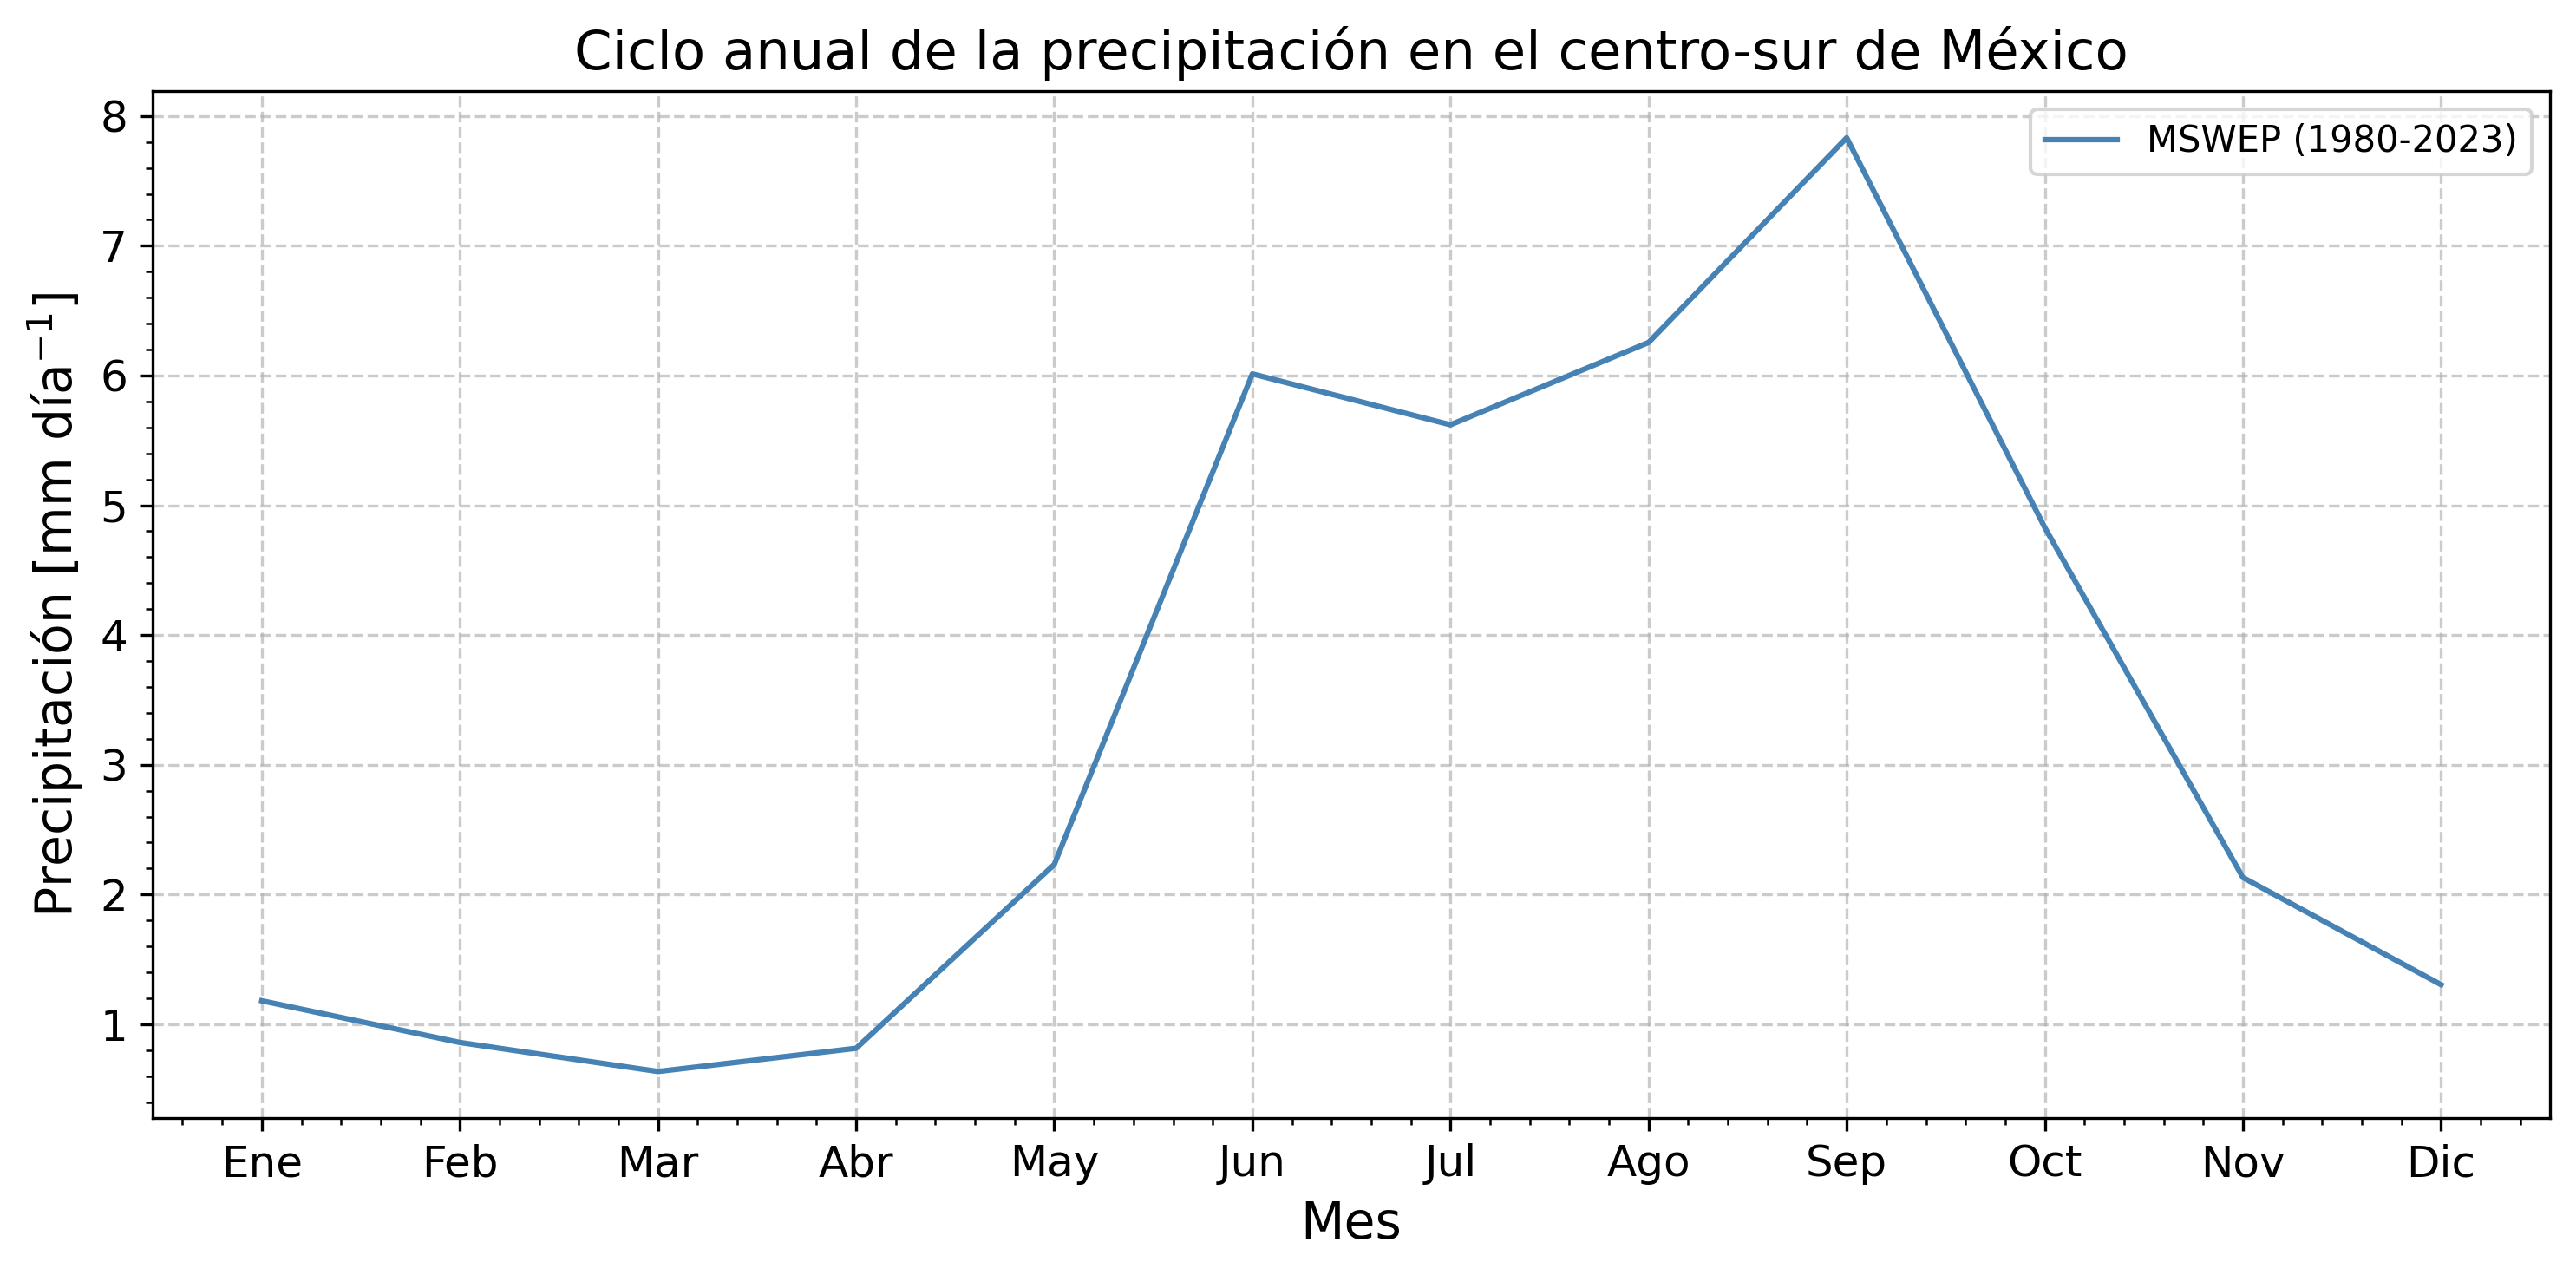

In [24]:
plt.figure(figsize=(10,5), dpi=300)
plt.plot(meses,mensual_prcentro,c='steelblue',label='MSWEP (1980-2023)') 
lineplot_setup(None,None,'Mes','Precipitación [mm día$^{-1}$]',title='Ciclo anual de la precipitación en el centro-sur de México')
plt.legend()
plt.tight_layout()

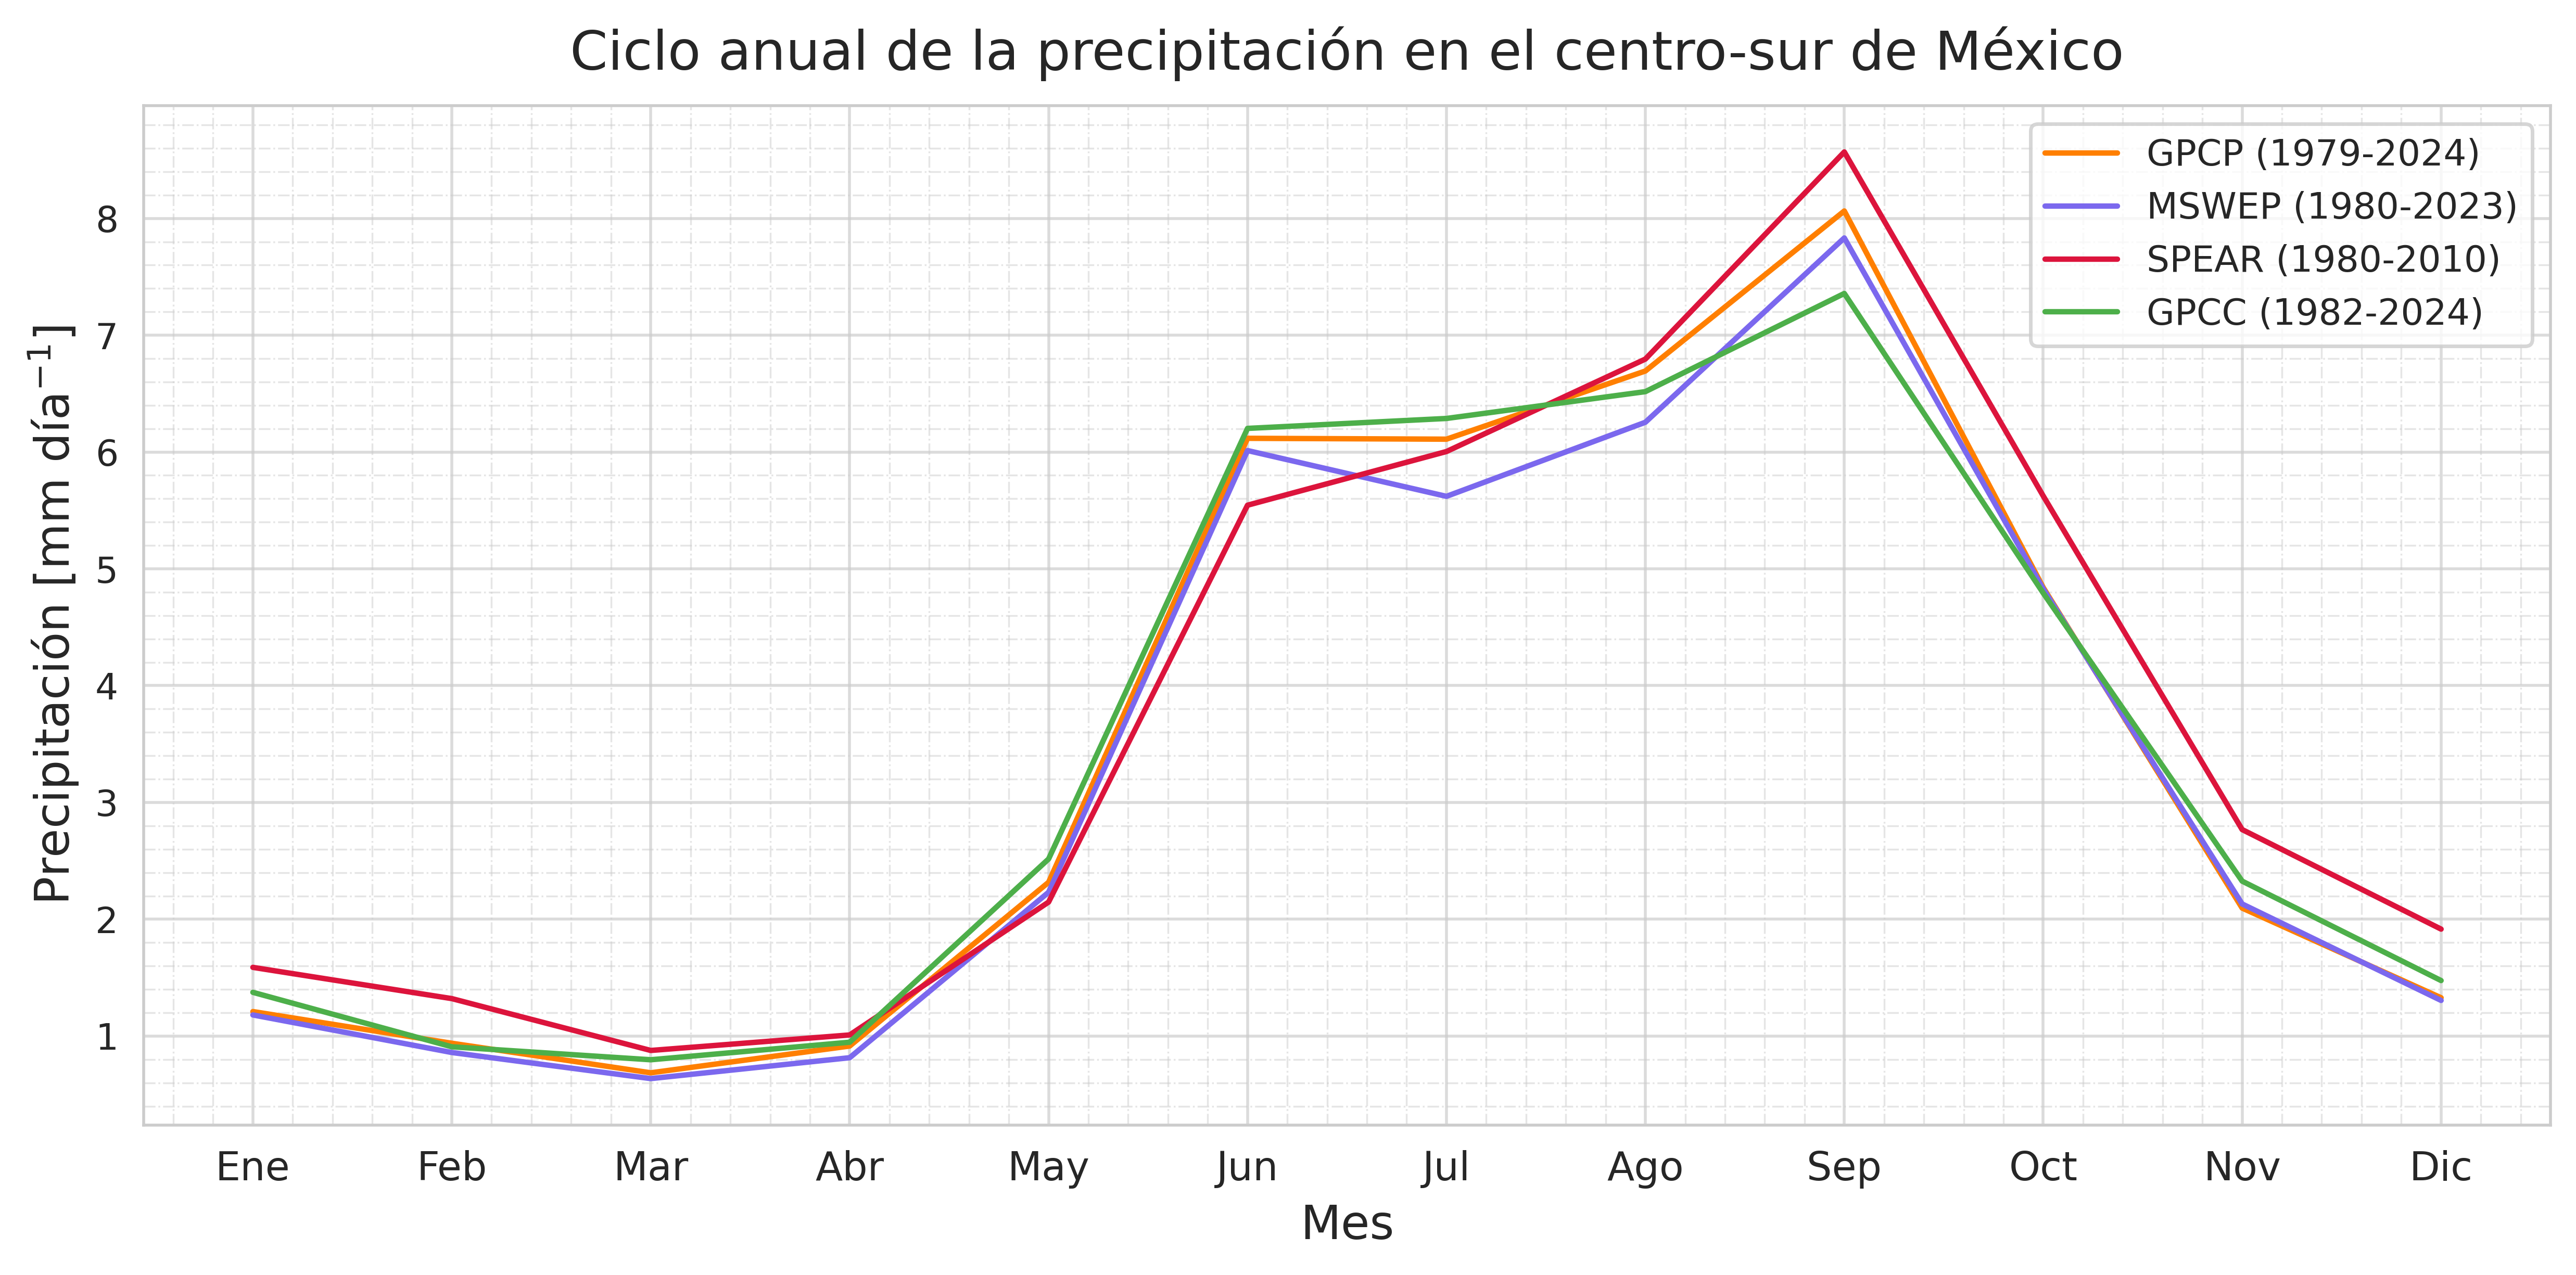

In [25]:
# Figura con todos los ciclos anuales
sns.set_style("whitegrid")

# Cargamos datos de cada archivo
ds_MSWEP = xr.open_dataset('MSWEP_ciclo_actualizado.nc')
ds_GPCP = xr.open_dataset('GPCP_ciclo_actualizado.nc')
ds_GPCC = xr.open_dataset('GPCC_ciclo_actualizado.nc')
ds_SPEAR1 = xr.open_dataset('SPEAR21_ciclo.nc')
ds_SPEAR2 = xr.open_dataset('SPEAR80_ciclo.nc')


# Extraemos la variable, cambia en cada caso
mswep = ds_MSWEP['precipitation']
gpcp = ds_GPCP['precip']
gpcc = ds_GPCC['precip']
spear = ds_SPEAR1['precip']
spear_2 = ds_SPEAR2['precip']


plt.figure(figsize=(10, 5), dpi=500)
# Graficamos cada uno
plt.plot(meses, gpcp, c='#ff7f00', label='GPCP (1979-2024)')
plt.plot(meses, mswep, c='mediumslateblue', label='MSWEP (1980-2023)')
#plt.plot(meses, spear, c='dodgerblue', label='SPEAR (1921-2010)') En caso de querer observar el ciclo completo
plt.plot(meses, spear_2, c='crimson', label='SPEAR (1980-2010)')
plt.plot(meses, gpcc, c='#4daf4a', label='GPCC (1982-2024)')


plt.xlabel('Mes',fontsize=13)
plt.ylabel('Precipitación [mm día$^{-1}$]',fontsize=13)
plt.title('Ciclo anual de la precipitación en el centro-sur de México',fontsize=15, pad=10, x=0.5)
plt.xticks(meses, ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],fontsize=11)
plt.legend()
plt.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.7) 
plt.grid(True, which='minor', linestyle='-.', linewidth=0.5, alpha=0.5)
plt.minorticks_on() 
ax = plt.gca()  
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))  # Intervalos de 1 en 1
plt.tight_layout()
plt.show()